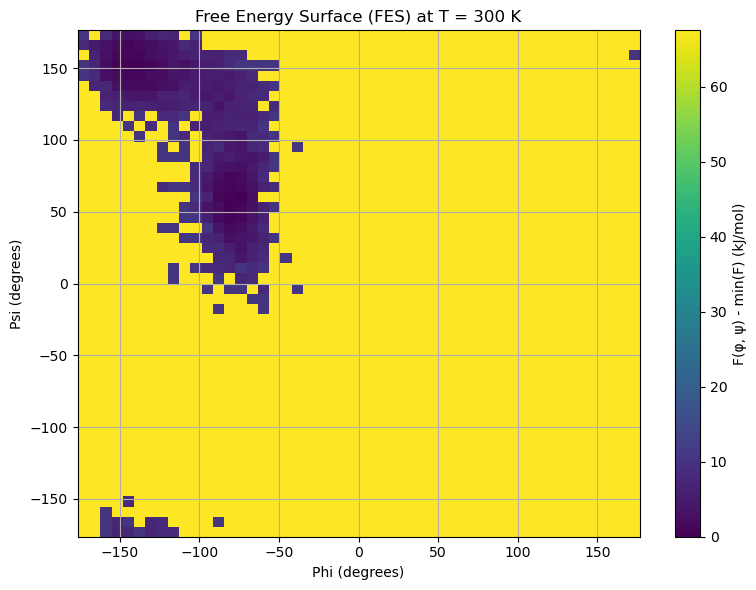

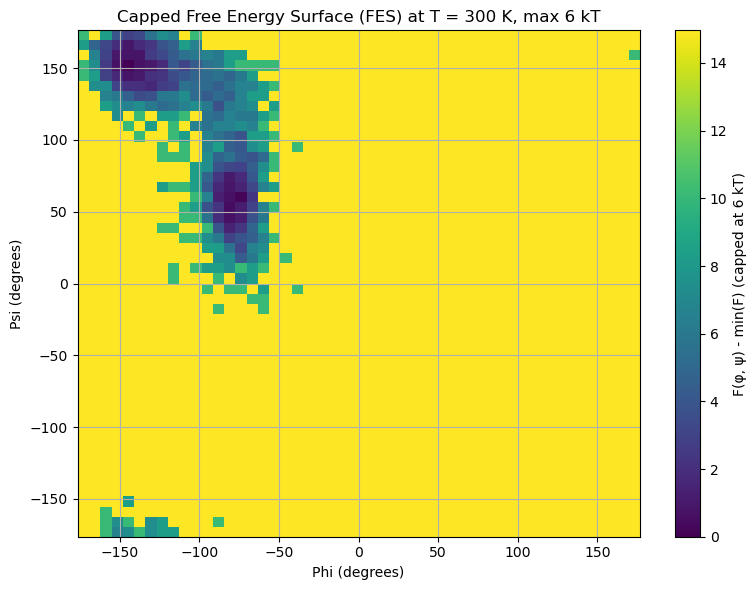

In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory for T=300 K (adjust the path as needed)
trajectory = md.load('T300/adp_exchange3temps.xtc', top='T300/adp.gro')

# Compute phi and psi angles
phi_indices, phi_angles = md.compute_phi(trajectory)
psi_indices, psi_angles = md.compute_psi(trajectory)

# Convert angles to degrees for easier interpretation
phi_angles_deg = np.degrees(phi_angles[:, 0])
psi_angles_deg = np.degrees(psi_angles[:, 0])

# Create a 2D histogram of phi and psi angles
bins = 50  # Number of bins for the histogram
hist, x_edges, y_edges = np.histogram2d(phi_angles_deg, psi_angles_deg, bins=bins, range=[[-180, 180], [-180, 180]])

# Calculate free energy surface: F(phi, psi) = -k_B * T * ln(histogram)
# k_B in units of kJ/(mol*K), T = 300 K
k_B = 0.008314  # Boltzmann constant in kJ/(mol*K)
temperature = 300  # Temperature in Kelvin

# Avoid taking the log of zero by adding a small value to the histogram
hist += 1e-10
fes = -k_B * temperature * np.log(hist)

# Normalize the free energy to set the minimum to zero
fes -= np.min(fes)

# Set the maximum free energy to 6 kT for visualization
fes_max_6kT = np.copy(fes)
max_free_energy = 6 * k_B * temperature  # Calculate 6 kT in kJ/mol
fes_max_6kT[fes_max_6kT > max_free_energy] = max_free_energy

# Calculate the bin centers for plotting
x_bin_centers = 0.5 * (x_edges[:-1] + x_edges[1:])
y_bin_centers = 0.5 * (y_edges[:-1] + y_edges[1:])

# Plot the original free energy surface
plt.figure(figsize=(8, 6))
extent = [x_bin_centers[0], x_bin_centers[-1], y_bin_centers[0], y_bin_centers[-1]]
im = plt.imshow(fes.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(im, label='F(φ, ψ) - min(F) (kJ/mol)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Free Energy Surface (FES) at T = 300 K')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the capped free energy surface (max 6 kT)
plt.figure(figsize=(8, 6))
im = plt.imshow(fes_max_6kT.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(im, label='F(φ, ψ) - min(F) (capped at 6 kT)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Capped Free Energy Surface (FES) at T = 300 K, max 6 kT')
plt.grid(True)
plt.tight_layout()
plt.show()
